### Importing and Pre-processing

In [ ]:
#importing the dependencies
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Getting the data

mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Analysis of the datasets
print("--------- Train Datasets----------")
print("Shape of the X_train is: ", X_train.shape)
print("Shape of the y_train is: ", y_train.shape)
print("\n")
print("--------- Test Datasets----------")
print("Shape of the X_test is: ", X_test.shape)
print("Shape of the y_test is: ", y_test.shape)

--------- Train Datasets----------
Shape of the X_train is:  (60000, 28, 28)
Shape of the y_train is:  (60000,)


--------- Test Datasets----------
Shape of the X_test is:  (10000, 28, 28)
Shape of the y_test is:  (10000,)


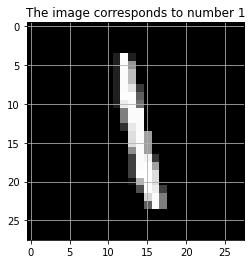

In [ ]:
random_serial = 104
plt.imshow(X_train[random_serial], cmap = "gray")
plt.grid(True)
plt.title("The image corresponds to number " + str(y_train[random_serial]))
plt.show()

In [ ]:
#Normalizing the data
print("Maximum pixel value before normalizing is:", X_train.max())
print("Minimum pixel value before normalizing is:", X_train.min())

X_train = X_train/255.
X_test = X_test/255.

#Maximum and Minimum for X_test, X_train will be in the same range
print("Maximum pixel value before normalizing is:", X_train.max())
print("Minimum pixel value before normalizing is:", X_train.min())

Maximum pixel value before normalizing is: 255
Minimum pixel value before normalizing is: 0
Maximum pixel value before normalizing is: 1.0
Minimum pixel value before normalizing is: 0.0


In [ ]:
X_train = X_train.reshape(60000, 28, 28,1)     #Need to reshape data fro CNN (batch_size, width, height, color_channel)
X_test = X_test.reshape(10000, 28, 28,1)       #Need to reshape data fro CNN (batch_size, width, height, color_channel)

In [ ]:
#Analysis of the datasets
print("--------- Train Datasets----------")
print("Shape of the X_train is: ", X_train.shape)
print("Shape of the y_train is: ", y_train.shape)
print("\n")
print("--------- Test Datasets----------")
print("Shape of the X_test is: ", X_test.shape)
print("Shape of the y_test is: ", y_test.shape)

--------- Train Datasets----------
Shape of the X_train is:  (60000, 28, 28, 1)
Shape of the y_train is:  (60000,)


--------- Test Datasets----------
Shape of the X_test is:  (10000, 28, 28, 1)
Shape of the y_test is:  (10000,)


### Defining the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

def my_model():
  model = Sequential()
  model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape= (28,28,1)))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
  model.add(MaxPool2D(pool_size = (2,2)))
  # model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu"))
  # model.add(MaxPool2D(pool_size = (3,3)))
  model.add(Flatten())
  model.add(Dense(units = 128, activation = "relu"))
  model.add(Dense(units = 10, activation = "softmax"))

  model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

  return model


In [ ]:
model = my_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = "val_loss", patience = 10)

In [ ]:
history_data = model.fit(X_train, y_train, epochs = 5000, validation_data= (X_test,y_test), callbacks = [callback])

Epoch 1/5000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0329 - val_accuracy: 0.9908
Epoch 2/5000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 3/5000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0369 - val_accuracy: 0.9906
Epoch 4/5000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0322 - val_accuracy: 0.9919
Epoch 5/5000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0449 - val_accuracy: 0.9903
Epoch 6/5000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0352 - val_accuracy: 0.9921
Epoch 7/5000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0473 -

### Analyzing the Outcome

In [ ]:
history_df = pd.DataFrame(history_data.history, index = list(range(1,21)))
history_df

,loss,accuracy,val_loss,val_accuracy
1,0.014105,0.995467,0.032899,0.9908
2,0.010641,0.996567,0.034180,0.9903
3,0.010089,0.996567,0.036947,0.9906
4,0.008486,0.997417,0.032168,0.9919
5,0.007064,0.997367,0.044934,0.9903
6,0.006615,0.997667,0.035183,0.9921
7,0.004873,0.998417,0.047344,0.9902
8,0.005272,0.998217,0.042622,0.9920
9,0.005764,0.998150,0.038823,0.9915
10,0.004181,0.998633,0.064789,0.9887


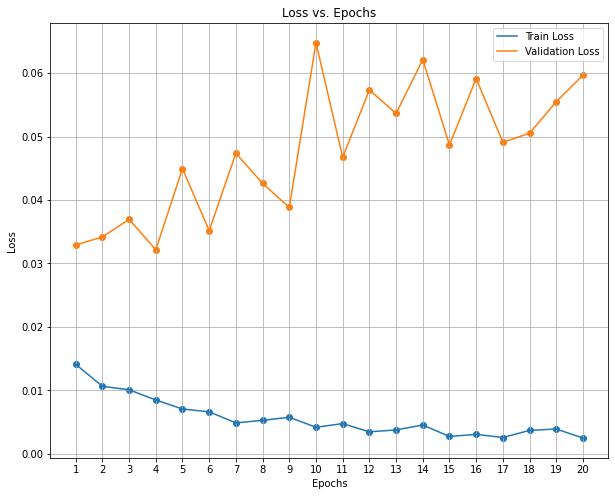

In [ ]:
#Plotting the acciracy

plt.subplots(figsize = (10,8))
plt.plot(np.arange(1, 21),history_df["loss"])
plt.scatter(np.arange(1, 21),history_df["loss"])

plt.plot(np.arange(1, 21),history_df["val_loss"])
plt.scatter(np.arange(1, 21),history_df["val_loss"])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(1, 21))
plt.title("Loss vs. Epochs")
plt.grid(True)
plt.legend(('Train Loss', 'Validation Loss'))
plt.show()

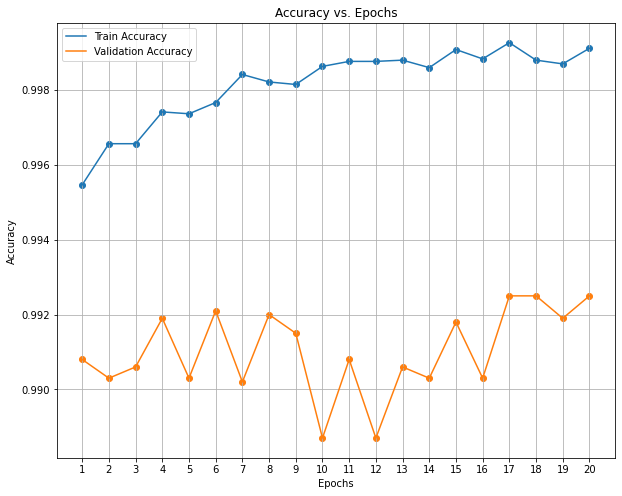

In [ ]:
#Plotting the acciracy

plt.subplots(figsize = (10,8))
plt.plot(np.arange(1, 21),history_df["accuracy"])
plt.scatter(np.arange(1, 21),history_df["accuracy"])

plt.plot(np.arange(1, 21),history_df["val_accuracy"])
plt.scatter(np.arange(1, 21),history_df["val_accuracy"])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 21))
plt.title("Accuracy vs. Epochs")
plt.grid(True)
plt.legend(('Train Accuracy', 'Validation Accuracy'))
plt.show()

### Evaluation

In [ ]:
pred = model.predict_classes(X_test, verbose = 1)

 87/313 [=======>......................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


313/313 [==============================] - 0s 1ms/step


In [ ]:
classification_df = pd.DataFrame({
    "y_test_actual" : y_test,
    "y_test_predicted" : pred
})

In [ ]:
classification_df

,y_test_actual,y_test_predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test, pred))

[[ 979    0    0    0    0    0    0    0    0    1]
 [   0 1132    0    0    0    0    1    1    0    1]
 [   2    1 1025    0    0    0    0    3    1    0]
 [   0    1    2  998    0    5    0    1    2    1]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    0    3    0  884    2    0    1    0]
 [   3    2    0    0    1    4  948    0    0    0]
 [   0    3    2    0    0    0    0 1020    1    2]
 [   2    0    1    1    1    0    1    1  965    2]
 [   1    0    0    0    4    4    1    1    3  995]]


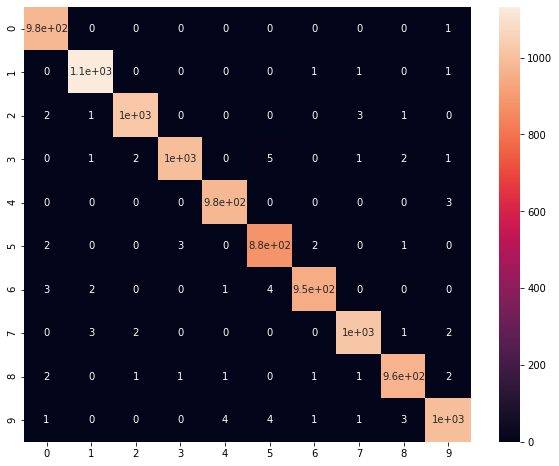

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, pred), annot = True)
plt.show()

In [ ]:
random_num = 121
print("Actual class is", y_test[random_num])
p = model.predict_classes(X_test[121].reshape(1,28,28,1))
print("Predicted class is", p.item())

Actual class is 4
Predicted class is 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
